# Red Neuronal Artificial para el pronóstico del precio de cierre de Amazon

A continuación, vamos a leer los datos históricos del precio de una acción al cierre del día de Amazon. La fuente la podemos encontrar en [Yahoo! Finanzas](https://es-us.finanzas.yahoo.com/quote/AMZN/history?period1=863654400&period2=1707091200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)


In [4]:
#Importación de librerías inicial
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1]:
#Librerías relacionadas a la red
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

In [2]:
def DescomponerSerie(serie, longitud):
    global X, y
    X, y = list(), list()
    for i in range(len(serie)):
        final = i + longitud
        if final > len(serie) - 1:
            break
        historia_x, target_y = serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return np.array(X), np.array(y)

In [14]:
Precios = pd.read_csv("C:/Users/clau_/OneDrive/Documentos/FCFM/03_Tetramestre/Aprendizaje_Profundo/Clase 03/Tarea 03/AMZN.csv")
display(Precios)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6719,2024-01-29,159.339996,161.289993,158.899994,161.259995,161.259995,45270400
6720,2024-01-30,160.699997,161.729996,158.490005,159.000000,159.000000,45207400
6721,2024-01-31,157.000000,159.009995,154.809998,155.199997,155.199997,50284400
6722,2024-02-01,155.869995,159.759995,155.619995,159.279999,159.279999,76542400


In [15]:
Precios["Date"] = pd.to_datetime(Precios["Date"], format = "%Y-%m-%d")
Precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6724 entries, 0 to 6723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6724 non-null   datetime64[ns]
 1   Open       6724 non-null   float64       
 2   High       6724 non-null   float64       
 3   Low        6724 non-null   float64       
 4   Close      6724 non-null   float64       
 5   Adj Close  6724 non-null   float64       
 6   Volume     6724 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 367.8 KB


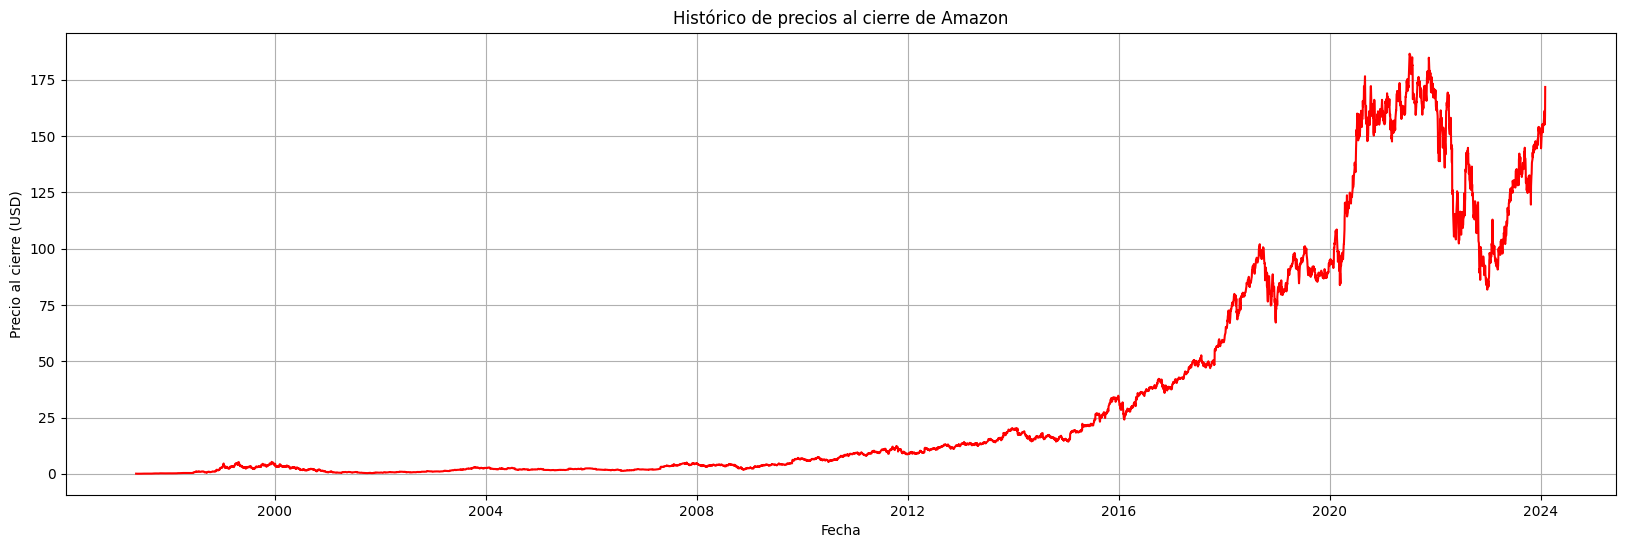

In [25]:
#Graficamos el histórico
plt.figure(figsize=(20, 6))
plt.plot(Precios["Date"], Precios["Close"], color="red")
plt.xlabel('Fecha')
plt.ylabel('Precio al cierre (USD)')
plt.title('Histórico de precios al cierre de Amazon')
plt.grid(True)


In [26]:
#Se convierte todo en una lista
SecuenciaPrecios = list(Precios["Close"])
print(SecuenciaPrecios)

[0.097917, 0.086458, 0.085417, 0.081771, 0.071354, 0.069792, 0.075, 0.079167, 0.076563, 0.07526, 0.075, 0.075521, 0.073958, 0.070833, 0.077083, 0.082813, 0.084375, 0.079167, 0.077083, 0.080208, 0.079167, 0.078646, 0.07526, 0.075521, 0.075521, 0.076302, 0.075, 0.075521, 0.075521, 0.075521, 0.074479, 0.077083, 0.075781, 0.079427, 0.095573, 0.1, 0.115104, 0.116146, 0.128125, 0.114583, 0.106771, 0.121875, 0.116667, 0.110938, 0.107813, 0.109115, 0.106771, 0.114583, 0.113021, 0.111458, 0.116146, 0.123958, 0.122396, 0.119792, 0.120833, 0.115625, 0.110417, 0.1125, 0.108854, 0.114583, 0.116406, 0.109896, 0.109896, 0.107813, 0.105729, 0.102083, 0.108333, 0.108333, 0.105729, 0.10625, 0.110938, 0.117188, 0.115885, 0.11875, 0.116927, 0.117708, 0.116667, 0.127604, 0.125, 0.15, 0.161979, 0.165104, 0.157813, 0.184375, 0.154688, 0.167708, 0.170313, 0.164583, 0.197396, 0.225, 0.23125, 0.21875, 0.203906, 0.208333, 0.202083, 0.216927, 0.201042, 0.200521, 0.200781, 0.20625, 0.202865, 0.20026, 0.1875, 0.195

In [27]:
DescomponerSerie(SecuenciaPrecios, 5)

(array([[9.79170000e-02, 8.64580000e-02, 8.54170000e-02, 8.17710000e-02,
         7.13540000e-02],
        [8.64580000e-02, 8.54170000e-02, 8.17710000e-02, 7.13540000e-02,
         6.97920000e-02],
        [8.54170000e-02, 8.17710000e-02, 7.13540000e-02, 6.97920000e-02,
         7.50000000e-02],
        ...,
        [1.56869995e+02, 1.57750000e+02, 1.59119995e+02, 1.61259995e+02,
         1.59000000e+02],
        [1.57750000e+02, 1.59119995e+02, 1.61259995e+02, 1.59000000e+02,
         1.55199997e+02],
        [1.59119995e+02, 1.61259995e+02, 1.59000000e+02, 1.55199997e+02,
         1.59279999e+02]]),
 array([6.97920000e-02, 7.50000000e-02, 7.91670000e-02, ...,
        1.55199997e+02, 1.59279999e+02, 1.71809998e+02]))

In [28]:
for i in range(len(X)):
    print(X[i], y[i])

[0.097917, 0.086458, 0.085417, 0.081771, 0.071354] 0.069792
[0.086458, 0.085417, 0.081771, 0.071354, 0.069792] 0.075
[0.085417, 0.081771, 0.071354, 0.069792, 0.075] 0.079167
[0.081771, 0.071354, 0.069792, 0.075, 0.079167] 0.076563
[0.071354, 0.069792, 0.075, 0.079167, 0.076563] 0.07526
[0.069792, 0.075, 0.079167, 0.076563, 0.07526] 0.075
[0.075, 0.079167, 0.076563, 0.07526, 0.075] 0.075521
[0.079167, 0.076563, 0.07526, 0.075, 0.075521] 0.073958
[0.076563, 0.07526, 0.075, 0.075521, 0.073958] 0.070833
[0.07526, 0.075, 0.075521, 0.073958, 0.070833] 0.077083
[0.075, 0.075521, 0.073958, 0.070833, 0.077083] 0.082813
[0.075521, 0.073958, 0.070833, 0.077083, 0.082813] 0.084375
[0.073958, 0.070833, 0.077083, 0.082813, 0.084375] 0.079167
[0.070833, 0.077083, 0.082813, 0.084375, 0.079167] 0.077083
[0.077083, 0.082813, 0.084375, 0.079167, 0.077083] 0.080208
[0.082813, 0.084375, 0.079167, 0.077083, 0.080208] 0.079167
[0.084375, 0.079167, 0.077083, 0.080208, 0.079167] 0.078646
[0.079167, 0.077083, 0

In [29]:
#DEFINE LA TAZA DE APRENDIZAJE ÓPTIMA
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer._decayed_lr(tf.float32)
    return lr

In [30]:
#Se define la red
model = Sequential()
model.add(Dense(5, input_dim = 5, activation = 'relu'))
model.add(Dense(1))

In [31]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=["accuracy"])

In [32]:
model.fit(X, y, epochs=673, batch_size=10)

Epoch 1/673


672/672 [==============================] - 3s 2ms/step - loss: 7.8626 - accuracy: 0.0000e+00
Epoch 2/673
672/672 [==============================] - 1s 2ms/step - loss: 6.5390 - accuracy: 0.0000e+00
Epoch 3/673
672/672 [==============================] - 1s 2ms/step - loss: 6.1781 - accuracy: 0.0000e+00
Epoch 4/673
672/672 [==============================] - 1s 2ms/step - loss: 5.4820 - accuracy: 0.0000e+00
Epoch 5/673
672/672 [==============================] - 1s 2ms/step - loss: 5.2871 - accuracy: 0.0000e+00
Epoch 6/673
672/672 [==============================] - 1s 2ms/step - loss: 4.9791 - accuracy: 0.0000e+00
Epoch 7/673
672/672 [==============================] - 1s 2ms/step - loss: 4.6339 - accuracy: 0.0000e+00
Epoch 8/673
672/672 [==============================] - 2s 2ms/step - loss: 4.3819 - accuracy: 0.0000e+00
Epoch 9/673
672/672 [==============================] - 1s 2ms/step - loss: 4.2209 - accuracy: 0.0000e+00
Epoch 10/673
672/672 [==============================]

In [33]:
predictions = model.predict(X)
print("predictions shape:", predictions)

210/210 [==============================] - 1s 2ms/step
predictions shape: [[9.1298960e-02]
 [9.2522405e-02]
 [9.5811859e-02]
 ...
 [1.5925903e+02]
 [1.5555891e+02]
 [1.5946143e+02]]


In [34]:
Predictions = pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()

,Predictions
0,0.091299
1,0.092522
2,0.095812
3,0.099138
4,0.099624


In [35]:
Real = pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,0.069792
1,0.075000
2,0.079167
3,0.076563
4,0.075260


In [38]:
RealPredictions = pd.concat([Precios["Date"], Predictions, Real], axis = 1)
RealPredictions = pd.DataFrame(RealPredictions)
RealPredictions

,Date,Predictions,Real
0,1997-05-15,0.091299,0.069792
1,1997-05-16,0.092522,0.075000
2,1997-05-19,0.095812,0.079167
3,1997-05-20,0.099138,0.076563
4,1997-05-21,0.099624,0.075260
...,...,...,...
6719,2024-01-29,NaN,NaN
6720,2024-01-30,NaN,NaN
6721,2024-01-31,NaN,NaN
6722,2024-02-01,NaN,NaN


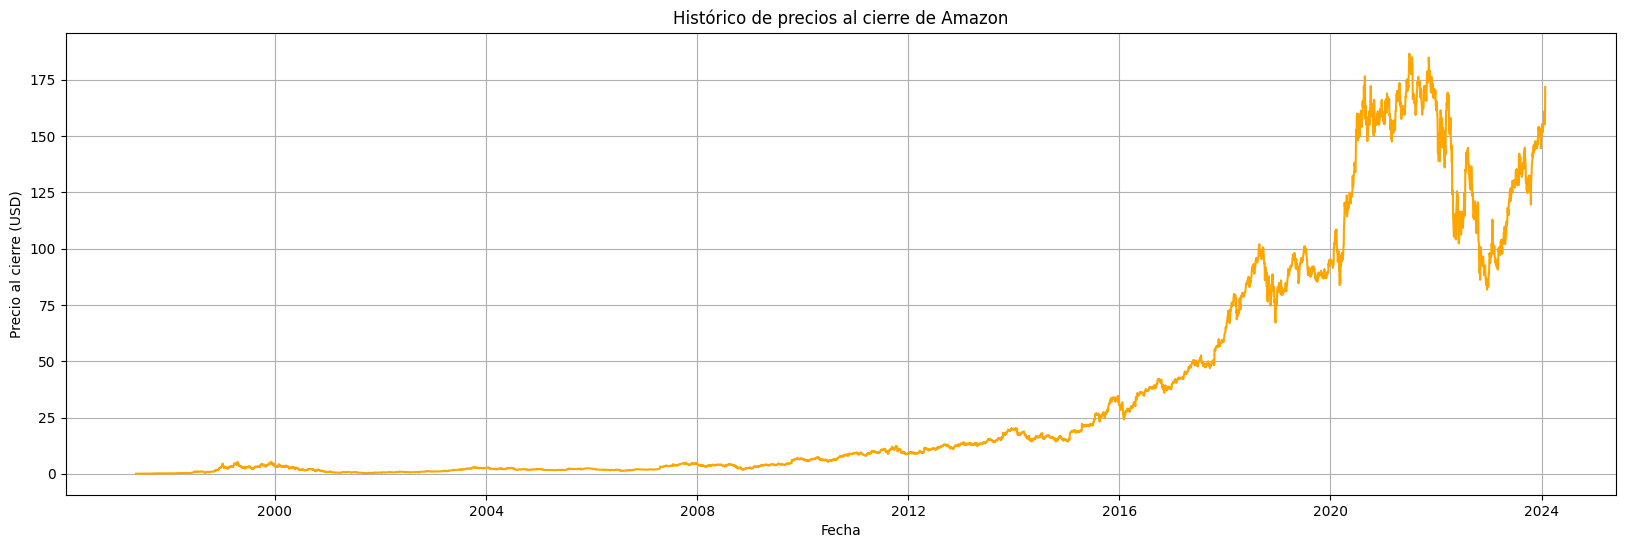

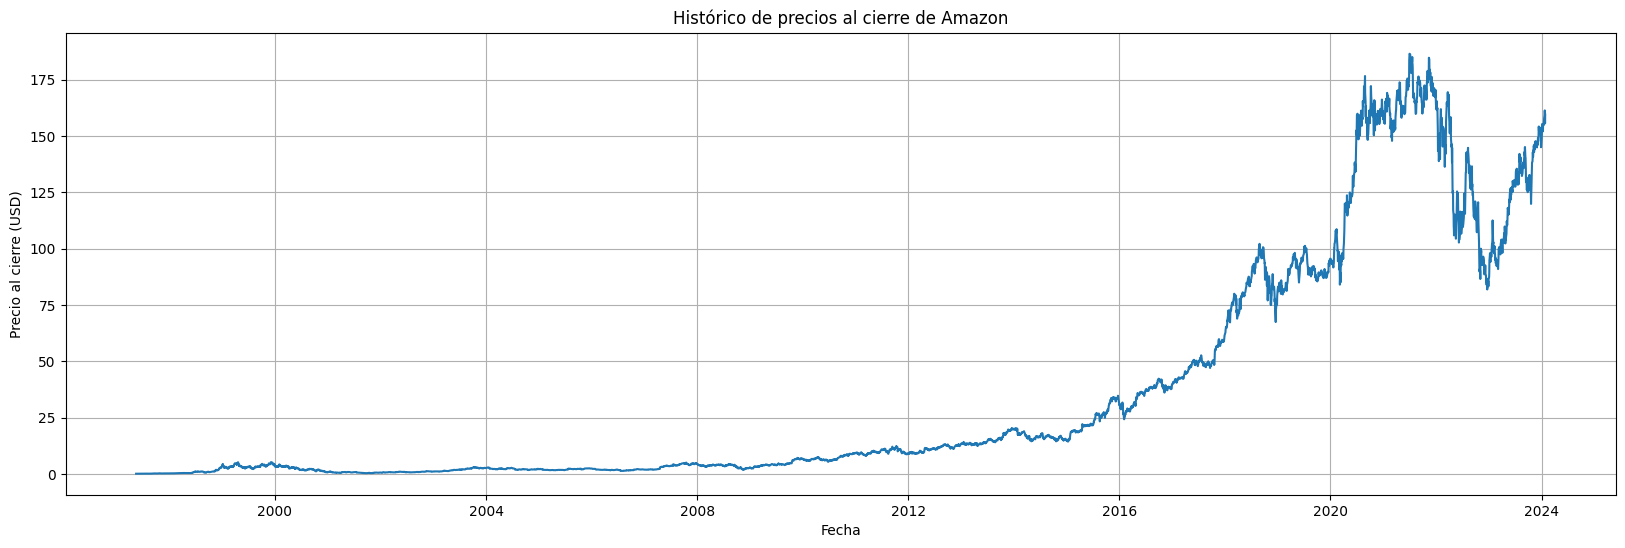

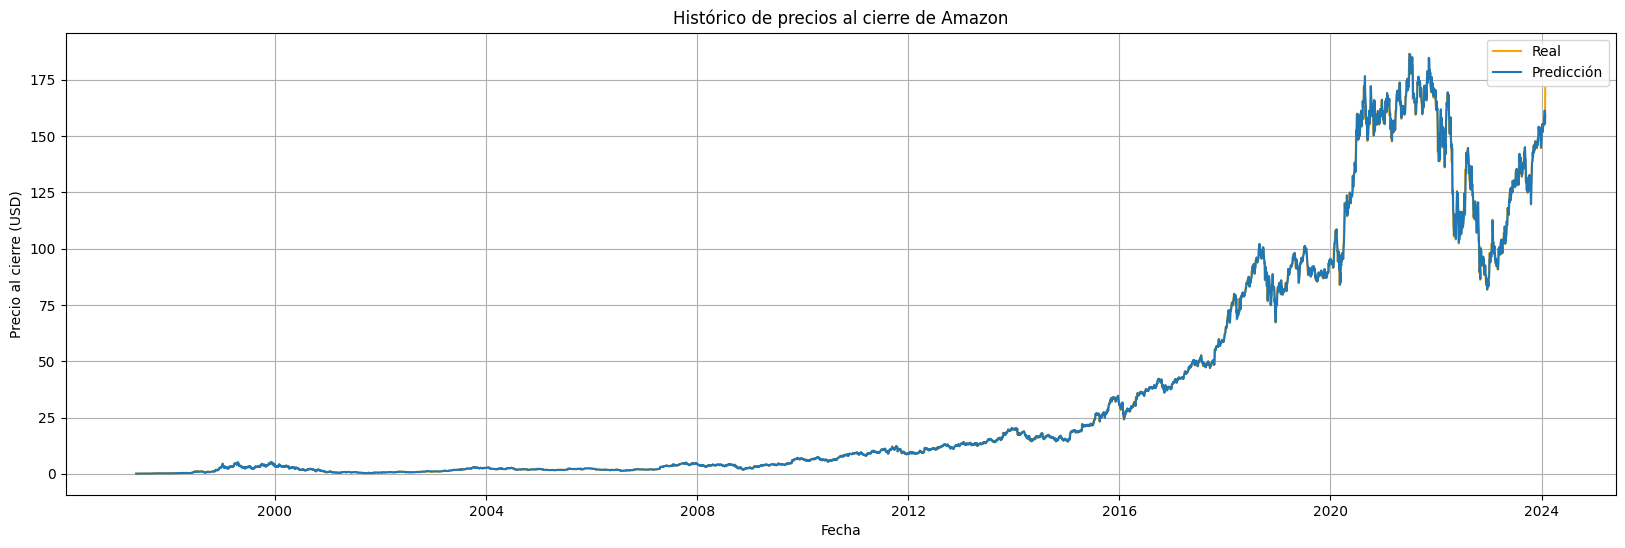

In [44]:
#Graficamos el histórico
plt.figure(figsize=(20, 6))
plt.xlabel('Fecha')
plt.ylabel('Precio al cierre (USD)')
plt.title('Histórico de precios al cierre de Amazon')
plt.grid(True)
plt.plot(RealPredictions["Date"], RealPredictions["Real"], color="orange")
plt.show()
plt.figure(figsize=(20, 6))
plt.xlabel('Fecha')
plt.ylabel('Precio al cierre (USD)')
plt.title('Histórico de precios al cierre de Amazon')
plt.grid(True)
plt.plot(RealPredictions["Date"], RealPredictions["Predictions"])
plt.show()
plt.figure(figsize=(20, 6))
plt.xlabel('Fecha')
plt.ylabel('Precio al cierre (USD)')
plt.title('Histórico de precios al cierre de Amazon')
plt.grid(True)
plt.plot(RealPredictions["Date"], RealPredictions["Real"], color="orange", label = "Real")
plt.plot(RealPredictions["Date"], RealPredictions["Predictions"], label = "Predicción")
plt.legend()
